**Analyse **
train
- Umap des séquences : fichier UMAP.py
- Umap des réactivités : fiichier UMAP_reactivité.py
  * Réactivité 2A3
  * Réactivité DMS
-> faire les UMAP sur le test après

Distribution
SN filter
 - SN filter à 1 ou 0 DMS
 - SN filter à 1 ou 0 2A3

 Signal to noise
 - DMS
 - 2A3

Reads
- Distribution du nombre de reads 🇰
  * DMS
  * 2A3

Séquence
- longueur des séquences
- occurence des séquences dans le jeu de données entier
- occurence des séquences dans DMS
- occurence des séquences dans 2A3
- Alignement de séquences ?
- Composition du nombre de base (A,T,C,G) dans toutes les séquences


Réactivité
- occurence des NAN à chaque position ou occurence des valeurs présentes:
  * pour DMS
  * pour 2A3
- correlation entre les valeurs de réactivités




In [ ]:
from google.colab import drive
import seaborn as sns
import dask.dataframe as dd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Jeu de données :

In [ ]:
drive.mount('/content/drive')
# Define the path of the CSV file
csv_path = '/content/drive/MyDrive/M2BI/AIAO/projet/analyze/Copie de train_data.csv'

Mounted at /content/drive


In [ ]:
# Load the CSV file as a Dask DataFrame
train_data = dd.read_csv(csv_path)

In [ ]:
train_data.tail()

,sequence_id,sequence,experiment_type,dataset_name,reads,signal_to_noise,SN_filter,reactivity_0001,reactivity_0002,reactivity_0003,...,reactivity_error_0197,reactivity_error_0198,reactivity_error_0199,reactivity_error_0200,reactivity_error_0201,reactivity_error_0202,reactivity_error_0203,reactivity_error_0204,reactivity_error_0205,reactivity_error_0206
43633,7951fb2f47f1,GGGAACGACUCGAGUAGAGUCGAAAAGGAGCGUCGUGUCUCUUGUA...,DMS_MaP,SL5_M2seq_DMS,37530,7.248,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43634,e0dc5823e5e1,GGGAACGACUCGAGUAGAGUCGAAAAGGAGCGUCGUGUCUCUUGUA...,DMS_MaP,SL5_M2seq_DMS,337248,17.902,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43635,0d6036529b42,GGGAACGACUCGAGUAGAGUCGAAAAGGAGCGUCGUGUCUCUUGUA...,DMS_MaP,SL5_M2seq_DMS,44053,6.700,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43636,46d1f07d723b,GGGAACGACUCGAGUAGAGUCGAAAAGGAGCGUCGUGUCUCUUGUA...,DMS_MaP,SL5_M2seq_DMS,108600,11.716,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43637,60db72cc009f,GGGAACGACUCGAGUAGAGUCGAAAAGGAGCGUCGUGUCUCUUGUA...,DMS_MaP,SL5_M2seq_DMS,107394,10.888,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Séparation SN filer 1 et SN filter 0

In [ ]:
train_1 = train_data[train_data['SN_filter'] == 1]
train_0 = train_data[train_data['SN_filter'] == 0]

In [ ]:
# Assume that you have already created the 'train_data' DataFrame and filtered it to create 'train_1'.
# If not, you can create 'train_1' as you mentioned in your question.

# Example:
# train_1 = train_data[train_data['SN_filter'] == 1]
train_1.to_csv("train_1.csv", index=False)
from google.colab import files
files.download("train_1.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

séparation DMS - 2A3 selon SN filer 1 et SN filer 0

In [ ]:
df_2A3_1 = train_1[train_1['experiment_type'] == "2A3_MaP"]
df_2A3_0 = train_0[train_0['experiment_type'] == "2A3_MaP"]

df_DMS_1 = train_1[train_1['experiment_type'] == "DMS_MaP"]
df_DMS_0 = train_0[train_0['experiment_type'] == "DMS_MaP"]

In [ ]:
df_2A3_0.head()

,sequence_id,sequence,experiment_type,dataset_name,reads,signal_to_noise,SN_filter,reactivity_0001,reactivity_0002,reactivity_0003,...,reactivity_error_0197,reactivity_error_0198,reactivity_error_0199,reactivity_error_0200,reactivity_error_0201,reactivity_error_0202,reactivity_error_0203,reactivity_error_0204,reactivity_error_0205,reactivity_error_0206
0,8cdfeef009ea,GGGAACGACUCGAGUAGAGUCGAAAAACGUUGAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,2343,0.944,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,c51a47a32fb0,GGGAACGACUCGAGUAGAGUCGAAAAACGUUGACAUGGAUUUACUC...,2A3_MaP,15k_2A3,1770,0.957,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,6c60f2ff365d,GGGAACGACUCGAGUAGAGUCGAAAAACGUUGAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,6544,0.707,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,bb7617d00abc,GGGAACGACUCGAGUAGAGUCGAAAAACGUUGAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,1739,0.825,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,c51d6d1574cf,GGGAACGACUCGAGUAGAGUCGAAAAACGUUGAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,3346,0.901,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# DMS SN Filter 1 sans le reactivity error
df_DMS_1_wo_error = df_DMS_1.drop(columns=[f"reactivity_error_{i:04d}" for i in range(1, 207)])
reactivity_error_DMS_1 = df_DMS_1.loc[:, [f"reactivity_error_{i:04d}" for i in range(1, 207)]]

# DMS SN Filter 0 sans le reactivity error
df_DMS_0_wo_error = df_DMS_0.drop(columns=[f"reactivity_error_{i:04d}" for i in range(1, 207)])
reactivity_error_DMS_0 = df_DMS_0.loc[:, [f"reactivity_error_{i:04d}" for i in range(1, 207)]]

# 2A3 SN Filter 1 sans le reactivity error
df_2A3_1_wo_error = df_2A3_1.drop(columns=[f"reactivity_error_{i:04d}" for i in range(1, 207)])
reactivity_error_2A3_1 = df_2A3_1.loc[:, [f"reactivity_error_{i:04d}" for i in range(1, 207)]]

# # 2A3 SN Filter 0 sans le reactivity error
df_2A3_0_wo_error = df_2A3_0.drop(columns=[f"reactivity_error_{i:04d}" for i in range(1, 207)])
reactivity_error_2A3_0 = df_2A3_0.loc[:, [f"reactivity_error_{i:04d}" for i in range(1, 207)]]


Proportion du DMS et du 2A3 dans tout le jeu de données

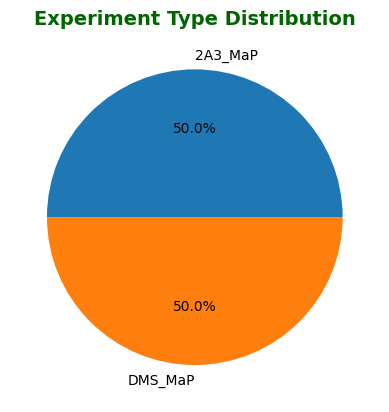

In [ ]:
experiment_type_counts = train_data['experiment_type'].value_counts()
plt.pie(experiment_type_counts, labels=experiment_type_counts.index, autopct='%1.1f%%')
plt.title('Experiment Type Distribution', fontsize = 14, fontweight = 'bold', color = 'darkgreen')

# Show the plot
plt.show()

SN filter :

Répartition des SN filter à 1 et 0 dans tout le jeu de données

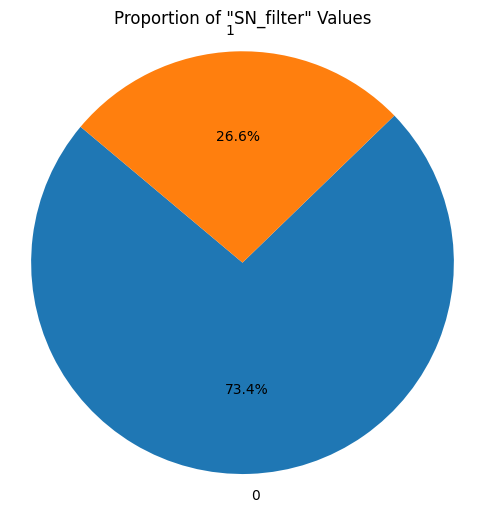

In [ ]:
# Compute the value counts for the "SN_filter" column
value_counts = train_data['SN_filter'].value_counts().compute()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of "SN_filter" Values')
plt.axis('equal')

# Show the pie chart
plt.show()

Répartition des SN filter à 1 ou 0 entre 2A3 et DMS

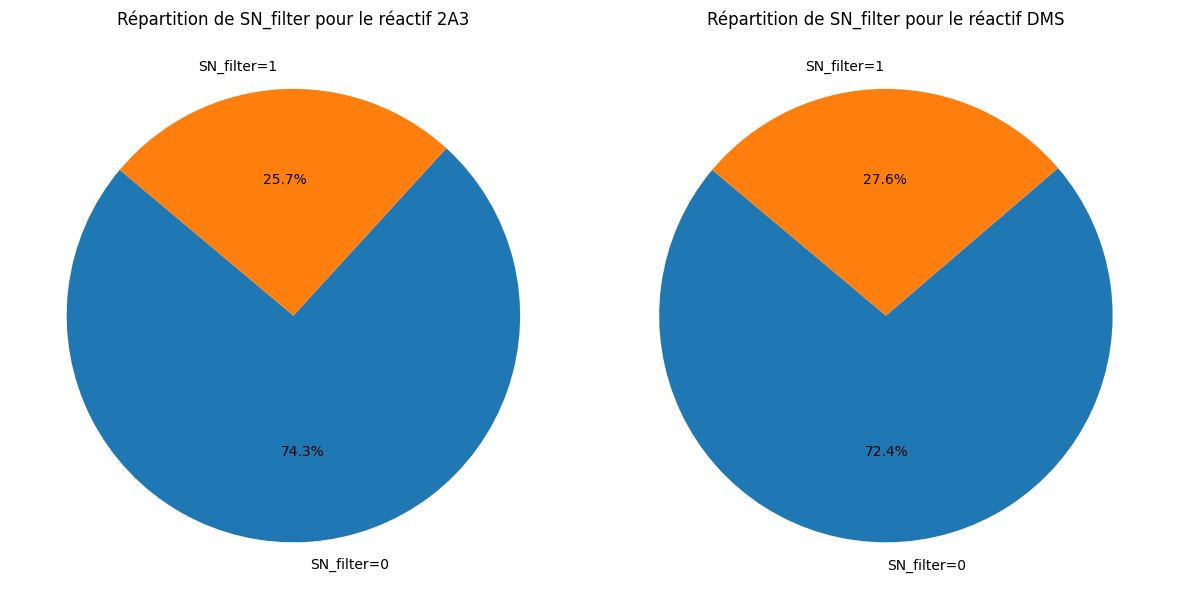

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
# Premier sous-graphique
df_2A3 = train_data[train_data['experiment_type'] == "2A3_MaP"]
count_2A3 = df_2A3['SN_filter'].value_counts()
ax1.pie(count_2A3, labels=['SN_filter=0', 'SN_filter=1'], autopct='%1.1f%%', startangle=140)
ax1.set_title('Répartition de SN_filter pour le réactif 2A3')

# Deuxième sous-graphique
df_DMS = train_data[train_data['experiment_type'] == "DMS_MaP"]
count_DMS = df_DMS['SN_filter'].value_counts()
ax2.pie(count_DMS, labels=['SN_filter=0', 'SN_filter=1'], autopct='%1.1f%%', startangle=140)
ax2.set_title('Répartition de SN_filter pour le réactif DMS')

# Ajustez l'espacement entre les deux sous-graphiques
plt.tight_layout()

# Affichez les deux sous-graphiques côte à côte
plt.show()

Signal to noise (tout SN filter confondu)

In [ ]:
print(f"min signal to noise (SN Filter 1) {train_1['signal_to_noise'].min().compute()}")
print(f"max signal to noise (SN Filter 1) {train_1['signal_to_noise'].max().compute()}")

print(f"min signal to noise (SN Filter 0) {train_0['signal_to_noise'].min().compute()}")
print(f"max signal to noise (SN Filter 0) {train_0['signal_to_noise'].max().compute()}")

min signal to noise (SN Filter 1) 1.0
max signal to noise (SN Filter 1) 256.371
min signal to noise (SN Filter 0) -1.672
max signal to noise (SN Filter 0) 4.598


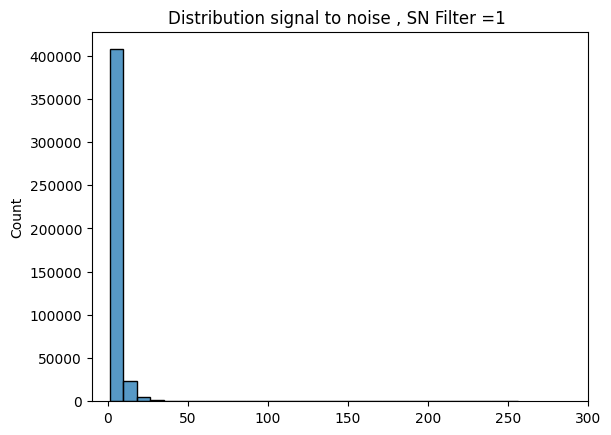

In [ ]:
sns.histplot(train_1['signal_to_noise'],bins=30) #.hist(bins=100)
plt.title('Distribution signal to noise , SN Filter =1 ')
plt.xlim(-10, 300)
plt.show()

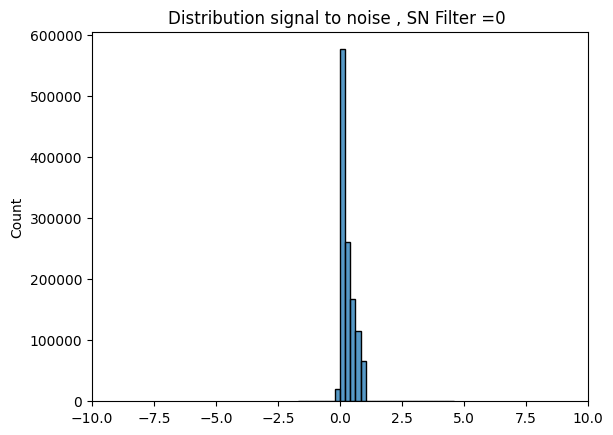

In [ ]:
sns.histplot(train_0['signal_to_noise'],bins=30) #.hist(bins=100)
plt.title('Distribution signal to noise , SN Filter =0 ')
plt.xlim(-10, 10)
plt.show()

In [ ]:
print(f"min 2A3 signal to noise (SN Filter 1) {df_2A3_1['signal_to_noise'].min().compute()}")
print(f"max 2A3 signal to noise (SN Filter 1) {df_2A3_1['signal_to_noise'].max().compute()}")

print(f"min 2A3 signal to noise (SN Filter 0) {df_2A3_0['signal_to_noise'].min().compute()}")
print(f"max 2A3 signal to noise (SN Filter 0) {df_2A3_0['signal_to_noise'].max().compute()}")

min 2A3 signal to noise (SN Filter 1) 1.0
max 2A3 signal to noise (SN Filter 1) 232.683
min 2A3 signal to noise (SN Filter 0) -0.523
max 2A3 signal to noise (SN Filter 0) 3.845


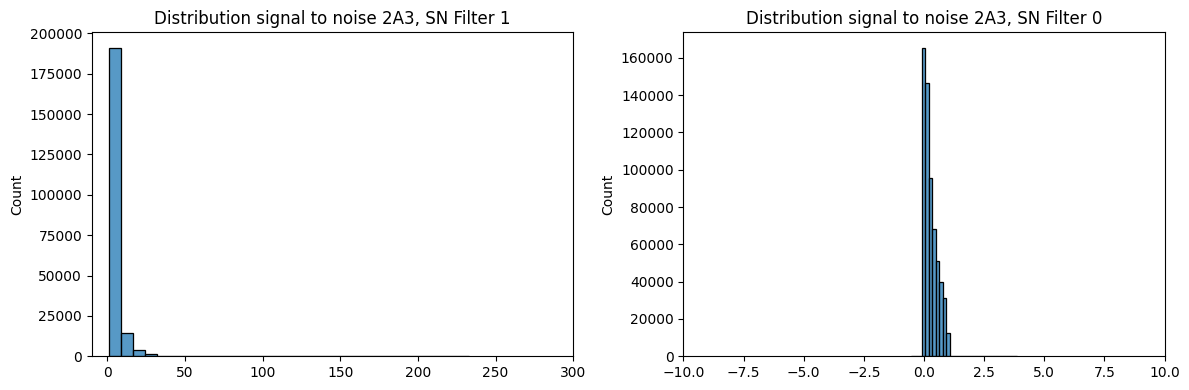

In [ ]:
# Créer une figure avec deux sous-graphiques côte à côte
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Tracer l'histogramme pour "2A3_MaP"
sns.histplot(df_2A3_1['signal_to_noise'], bins=30, ax=axes[0])
axes[0].set_title('Distribution signal to noise 2A3, SN Filter 1')
axes[0].set_xlim(-10, 300)


# Tracer l'histogramme pour "DMS_MaP"
sns.histplot(df_2A3_0['signal_to_noise'], bins=30, ax=axes[1])
axes[1].set_title('Distribution signal to noise 2A3, SN Filter 0')
axes[1].set_xlim(-10, 10)

# Afficher les graphiques côte à côte
plt.tight_layout()
plt.show()


In [ ]:
print(f"min DMS signal to noise (SN Filter 1) {df_DMS_1['signal_to_noise'].min().compute()}")
print(f"max DMS signal to noise (SN Filter 1) {df_DMS_1['signal_to_noise'].max().compute()}")

print(f"min DMS signal to noise (SN Filter 0) {df_DMS_0['signal_to_noise'].min().compute()}")
print(f"max DMS signal to noise (SN Filter 0) {df_DMS_0['signal_to_noise'].max().compute()}")

min DMS signal to noise (SN Filter 1) 1.0
max DMS signal to noise (SN Filter 1) 256.371
min DMS signal to noise (SN Filter 0) -1.672
max DMS signal to noise (SN Filter 0) 4.598


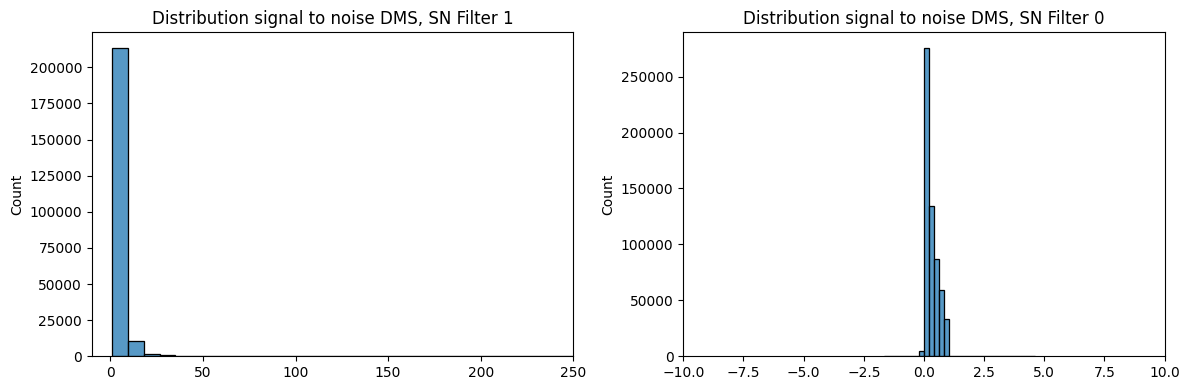

In [ ]:
# Créer une figure avec deux sous-graphiques côte à côte
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Tracer l'histogramme pour "2A3_MaP"
sns.histplot(df_DMS_1['signal_to_noise'], bins=30, ax=axes[0])
axes[0].set_title('Distribution signal to noise DMS, SN Filter 1')
axes[0].set_xlim(-10, 250)


# Tracer l'histogramme pour "DMS_MaP"
sns.histplot(df_DMS_0['signal_to_noise'], bins=30, ax=axes[1])
axes[1].set_title('Distribution signal to noise DMS, SN Filter 0')
axes[1].set_xlim(-10, 10)

# Afficher les graphiques côte à côte
plt.tight_layout()
plt.show()

Nombre de reads

In [ ]:
# 2A3 :
print(f"min 2A3 nb reads (SN Filter 1) {df_2A3_1['reads'].min().compute()}")
print(f"max 2A3 nb reads (SN Filter 1) {df_2A3_1['reads'].max().compute()}")

print(f"min 2A3 nb reads (SN Filter 0) {df_2A3_0['reads'].min().compute()}")
print(f"max 2A3 nb reads (SN Filter 0) {df_2A3_0['reads'].max().compute()}")

#DMS :
print(f"min DMS nb reads (SN Filter 1) {df_DMS_1['reads'].min().compute()}")
print(f"max DMS nb reads (SN Filter 1) {df_DMS_1['reads'].max().compute()}")

print(f"min DMS nb reads (SN Filter 0) {df_DMS_0['reads'].min().compute()}")
print(f"max DMS nb reads (SN Filter 0) {df_DMS_0['reads'].max().compute()}")

min 2A3 nb reads (SN Filter 1) 88.0
max 2A3 nb reads (SN Filter 1) 6170000.0
min 2A3 nb reads (SN Filter 0) 0.0
max 2A3 nb reads (SN Filter 0) 111324.0
min DMS nb reads (SN Filter 1) 195.0
max DMS nb reads (SN Filter 1) 14748128.0
min DMS nb reads (SN Filter 0) 0.0
max DMS nb reads (SN Filter 0) 121020.0


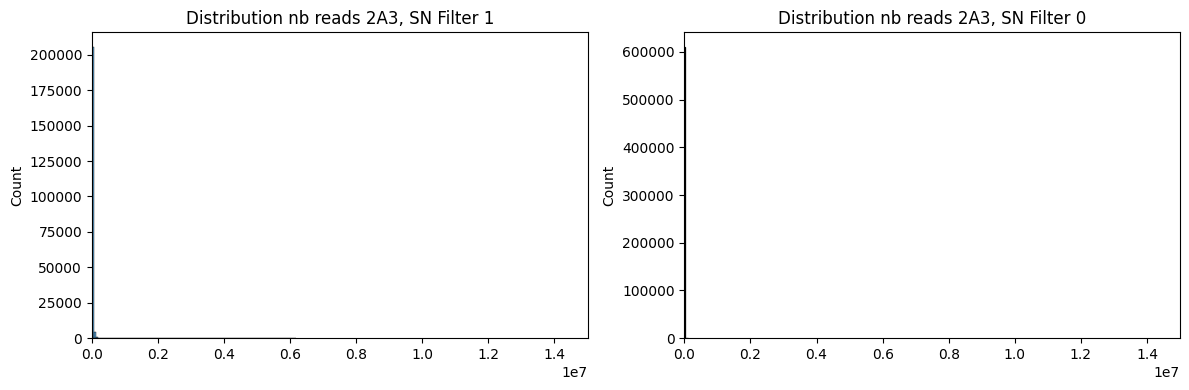

In [ ]:
# Créer une figure avec deux sous-graphiques côte à côte
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Tracer l'histogramme pour "2A3_MaP"
sns.histplot(df_2A3_1['reads'], bins=100, ax=axes[0])
axes[0].set_title('Distribution nb reads 2A3, SN Filter 1')
axes[0].set_xlim(0, 15000000)


# Tracer l'histogramme pour "DMS_MaP"
sns.histplot(df_2A3_0['reads'], bins=30, ax=axes[1])
axes[1].set_title('Distribution nb reads 2A3, SN Filter 0')
axes[1].set_xlim(0, 15000000)

# Afficher les graphiques côte à côte
plt.tight_layout()
plt.show()


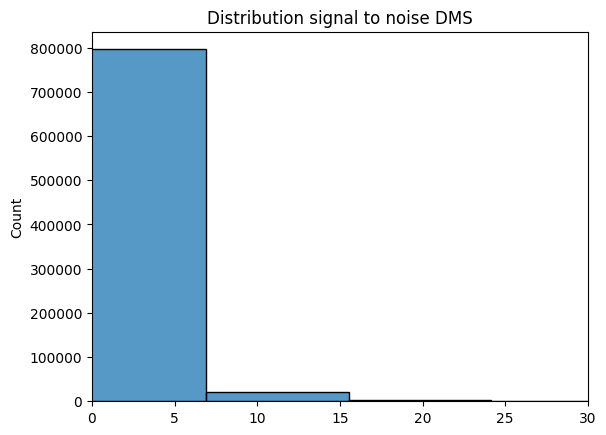

In [ ]:
df_2A3 = train_data[train_data['experiment_type'] == "DMS_MaP"]
sns.histplot(df_2A3['signal_to_noise'],bins=30) #.hist(bins=100)
plt.title('Distribution signal to noise DMS')
plt.xlim(0, 30)
plt.show()

suite analyse uniquement pour SN filter = 1

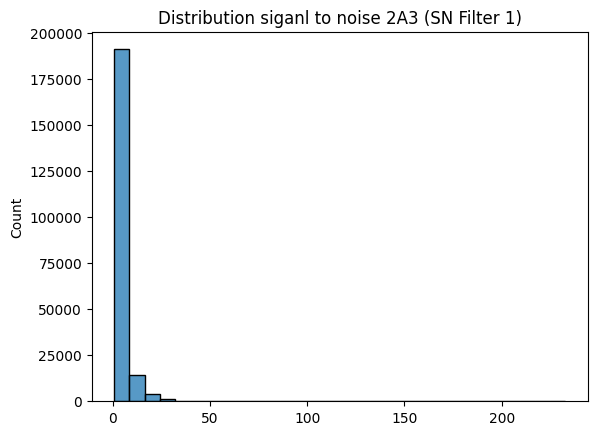

In [ ]:
df_2A3_1 = train_1[train_1['experiment_type'] == "2A3_MaP"]
sns.histplot(df_2A3_1['signal_to_noise'],bins=30) #.hist(bins=100)
plt.title('Distribution siganl to noise 2A3 (SN Filter 1)')
#plt.xlim(0, 30)
plt.show()

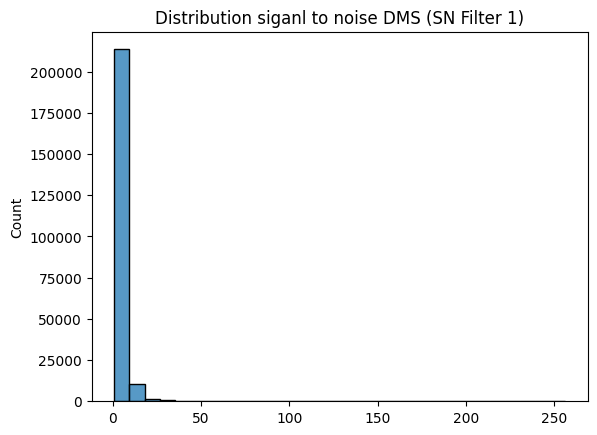

In [ ]:
df_DMS_1 = train_1[train_1['experiment_type'] == "DMS_MaP"]
sns.histplot(df_DMS_1['signal_to_noise'],bins=30) #.hist(bins=100)
plt.title('Distribution siganl to noise DMS (SN Filter 1)')
#plt.xlim(0, 30)
plt.show()

Reads (jeu de données SN filter 1 ou 0)

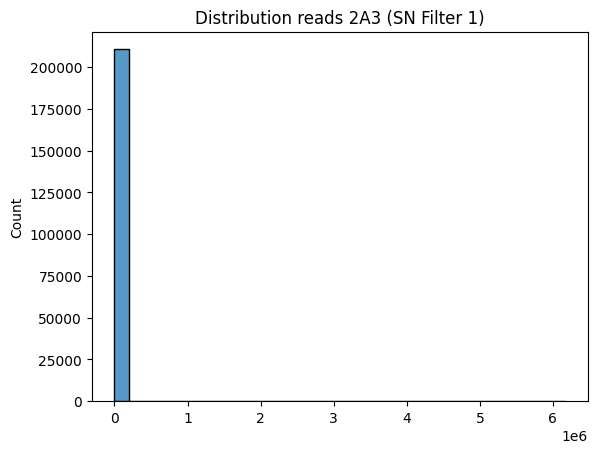

In [ ]:
df_2A3_1 = train_1[train_1['experiment_type'] == "2A3_MaP"]
sns.histplot(df_2A3_1['reads'],bins=30) #.hist(bins=100)
plt.title('Distribution reads 2A3 (SN Filter 1)')
#plt.xlim(0, 30)
plt.show()

In [ ]:
df_2A3_1['reads'].max().compute()

6170000.0

In [ ]:
## 2A3 et DMS sans les colonnes réactivity error
# Create an empty DataFrame to hold the "réactivity_error" columns
reactivity_error_data_2A3 = pd.DataFrame()
reactivity_error_data_DMS = dd.from_pandas(pd.DataFrame(), npartitions=1)



### 2A3
# Iterate over the column numbers and move them to the new DataFrame
for i in range(1, 207):
    column_name = f"reactivity_error_{i:04d}"  # Format the column name with leading zeros
    #reactivity_error_data_2A3[column_name] = df_2A3_1[column_name]
    df_2A3_1 = df_2A3_1.drop(columns=column_name)

In [ ]:
reactivity_error_data_DMS = pd.DataFrame()

### 2A3
# Iterate over the column numbers and move them to the new DataFrame
for i in range(1, 207):
    column_name = f"reactivity_error_{i:04d}"  # Format the column name with leading zeros
    #reactivity_error_data_2A3[column_name] = df_2A3_1[column_name]
    df_DMS_1 = df_DMS_1.drop(columns=column_name)

In [ ]:
df_DMS_1.head()

,sequence_id,sequence,experiment_type,dataset_name,reads,signal_to_noise,SN_filter,reactivity_0001,reactivity_0002,reactivity_0003,...,reactivity_0197,reactivity_0198,reactivity_0199,reactivity_0200,reactivity_0201,reactivity_0202,reactivity_0203,reactivity_0204,reactivity_0205,reactivity_0206
15002,25ce8d5109cd,GGGAACGACUCGAGUAGAGUCGAAAAACCUUGAUAUGGAUUUACUC...,DMS_MaP,15k_DMS,1964,1.848,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15003,07dcfb6d1965,GGGAACGACUCGAGUAGAGUCGAAAAACUUUGAUAUGGAUUUACUC...,DMS_MaP,15k_DMS,45863,9.291,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15004,e561cc042a4c,GGGAACGACUCGAGUAGAGUCGAAAAACGAUGAUAUGGAUUUACUC...,DMS_MaP,15k_DMS,6219,3.210,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15005,aa948762535f,GGGAACGACUCGAGUAGAGUCGAAAAACGCUGAUAUGGAUUUACUC...,DMS_MaP,15k_DMS,7024,3.109,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15007,fcc4f8255a75,GGGAACGACUCGAGUAGAGUCGAAAAACGUAGAUAUGGAUUUACUC...,DMS_MaP,15k_DMS,20481,5.924,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


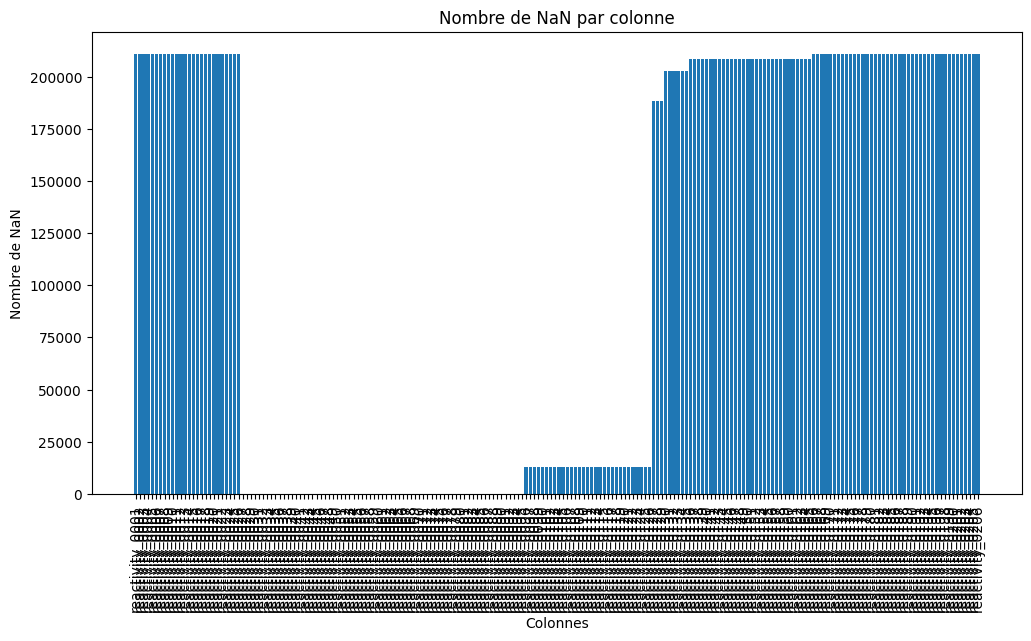

In [ ]:
nan_counts = df_2A3_1.iloc[:, 7:].isna().sum()

# Créez un histogramme des comptes de NaN
plt.figure(figsize=(12, 6))
plt.bar(nan_counts.index, nan_counts)
plt.xlabel('Colonnes')
plt.ylabel('Nombre de NaN')
plt.title('Nombre de NaN par colonne')
plt.xticks(rotation=90)
plt.show()

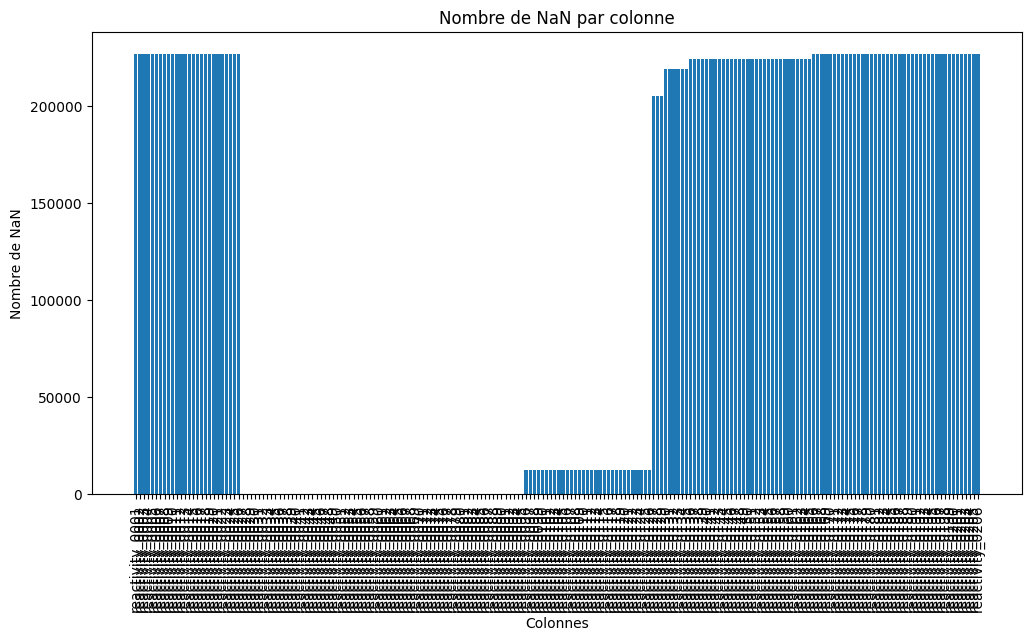

In [ ]:
nan_counts = df_DMS_1.iloc[:, 7:].isna().sum()

# Créez un histogramme des comptes de NaN
plt.figure(figsize=(12, 6))
plt.bar(nan_counts.index, nan_counts)
plt.xlabel('Colonnes')
plt.ylabel('Nombre de NaN')
plt.title('Nombre de NaN par colonne')
plt.xticks(rotation=90)
plt.show()

In [ ]:
unique_sequences = train_1["sequence"].drop_duplicates()

# Créer un nouveau DataFrame avec la colonne "Sequence" unique
unique_df = pd.DataFrame(unique_sequences, columns=["sequence"])

# Réinitialiser l'index du nouveau DataFrame
unique_df = unique_df.reset_index(drop=True)

# Afficher le DataFrame contenant les séquences uniques
print(unique_df)

                                                 sequence
0       GGGAACGACUCGAGUAGAGUCGAAAAACAUUGAUAUGGAUUUACUC...
1       GGGAACGACUCGAGUAGAGUCGAAAAACCUUGAUAUGGAUUUACUC...
2       GGGAACGACUCGAGUAGAGUCGAAAAACUUUGAUAUGGAUUUACUC...
3       GGGAACGACUCGAGUAGAGUCGAAAAACGAUGAUAUGGAUUUACUC...
4       GGGAACGACUCGAGUAGAGUCGAAAAACGCUGAUAUGGAUUUACUC...
...                                                   ...
242724  GGGAACGACUCGAGUAGAGUCGAAAAUCUACGGACACGAGUAACUC...
242725  GGGAACGACUCGAGUAGAGUCGAAAAUCUACGGACACGAGUAACUC...
242726  GGGAACGACUCGAGUAGAGUCGAAAAUCUACGGACACGAGUAACUC...
242727  GGGAACGACUCGAGUAGAGUCGAAAAUCUACGGACACGAGUAACUC...
242728  GGGAACGACUCGAGUAGAGUCGAAAAGGAGCGCCGUGUCUCUUGUA...

[242729 rows x 1 columns]


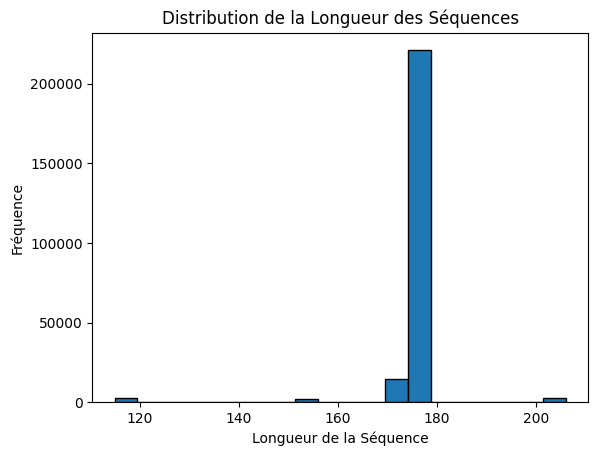

In [ ]:
unique_df["Sequence_Length"] = unique_df["sequence"].str.len()

# Afficher un histogramme de la distribution des longueurs des séquences
plt.hist(unique_df["Sequence_Length"], bins=20, edgecolor='k')
plt.xlabel("Longueur de la Séquence")
plt.ylabel("Fréquence")
plt.title("Distribution de la Longueur des Séquences")
plt.show()

occurence des séquences

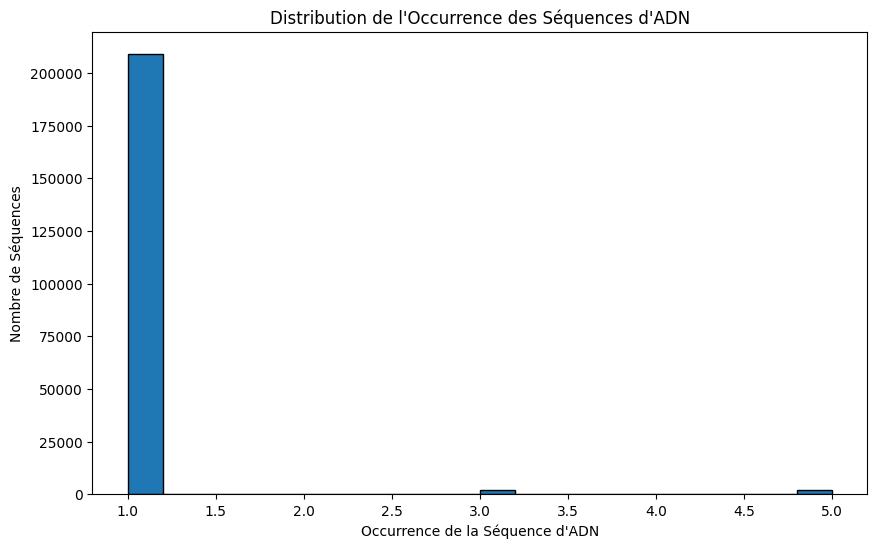

In [ ]:


sequence_df = df_DMS_1[["sequence"]]  # Utilisez des doubles crochets pour créer un DataFrame à partir d'une seule colonne

# Utilisez value_counts pour compter l'occurrence de chaque séquence
sequence_counts = sequence_df["sequence"].value_counts()

# Créez un histogramme de l'occurrence des séquences
plt.figure(figsize=(10, 6))  # Ajustez la taille du graphique selon vos préférences
plt.hist(sequence_counts, bins=20, edgecolor='k')
plt.xlabel("Occurrence de la Séquence d'ADN")
plt.ylabel("Nombre de Séquences")
plt.title("Distribution de l'Occurrence des Séquences d'ADN")
plt.show()

In [ ]:


# Créez un DataFrame contenant la colonne "Sequence" (changez le nom de la colonne selon le vôtre)
sequence_df = df_DMS_1[["sequence"]]  # Utilisez des doubles crochets pour créer un DataFrame à partir d'une seule colonne

# Utilisez value_counts pour compter l'occurrence de chaque séquence et triez les résultats
sequence_counts = sequence_df["sequence"].value_counts().reset_index()
sequence_counts.columns = ["Sequence", "Occurrence"]
sequence_counts = sequence_counts.sort_values(by="Occurrence", ascending=False)

# Créez un histogramme de l'occurrence des séquences
plt.figure(figsize=(10, 6))  # Ajustez la taille du graphique selon vos préférences
plt.bar(sequence_counts["Sequence"], sequence_counts["Occurrence"])
plt.xlabel("Séquence d'ADN")
plt.ylabel("Occurrence")
plt.title("Distribution de l'Occurrence des Séquences d'ADN")
plt.xticks(rotation=90)  # Pour faire pivoter les étiquettes de l'axe x, si nécessaire
plt.show()

In [ ]:


# Créez un tableau numpy bidimensionnel (2D) pour l'exemple
two_dimensional_array = np.array([[1, 2, 3], [4, 5, 6]])

# Utilisez .flatten() pour le transformer en un tableau numpy unidimensionnel (1D)
one_dimensional_array = two_dimensional_array.flatten()

# Affichez le tableau résultant
print(one_dimensional_array)

In [ ]:
# Create a copy of train_data
train_data2 = train_data
# Filter the rows where "SN_filter" is equal to 1
train_data2 = train_data2[train_data2['SN_filter'] == 1]
# Convert the Dask DataFrame to a Pandas DataFrame
train_data2 = train_data2.compute()